In [5]:
#importing packes and Libreries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [6]:
# 1. Load the Dataset

df = pd.read_csv("diabetes.csv")
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
# 2. Exploratory Data Analysis (EDA)

print("--- Data Head ---")
print(df.head())


--- Data Head ---
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [12]:
print("\n--- Data Info ---")
df.info()



--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
print("\n--- Data Description ---")
print(df.describe())



--- Data Description ---
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      

In [14]:
# Check for Missing Values

print("\n--- Missing Values ---")
print(df.isnull().sum())



--- Missing Values ---
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


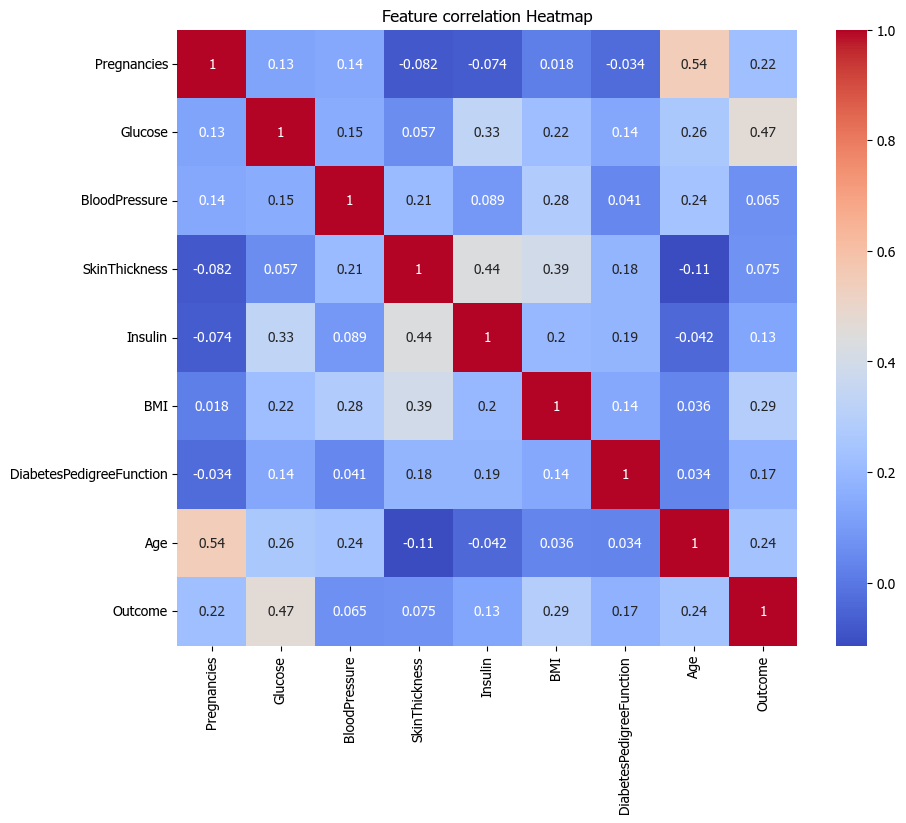

In [29]:
# Correlation Heatmap

plt.rc('font', family = 'Tahoma')
fig = plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.title('Feature correlation Heatmap')
plt.show()
fig.savefig('Feature correlation Heatmap.png')


In [17]:
# 3. Prepare Data for Linear Regression
# We'll use all features except 'Outcome' as predictors

X = df.drop('Outcome', axis = 1)
y = df['Outcome']

# Split into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [18]:
# 4. Train Linear Regression Model

lr = LinearRegression()
lr.fit(X_train,y_train)


LinearRegression()

In [19]:
# 5. Evaluation the Model
# Predict on test set

y_pred = lr.predict(X_test)


In [20]:
# Since Outcome is binary, but linear regression outcomes continuous values,
#we can threshold at 0.5 for classification accuracy (optional)

y_pred_class = (y_pred >= 0.5).astype(int)

#Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = (y_pred_class == y_test).mean()

print(f'\n--- Linear Regression Performance ---')
print(f'Mean Squared Error: {mse:.4f}')
print(f'R^2 Score: {r2:.4f}')
print(f'Classification Accuracy (threshold 0.5): {accuracy:.4f}')



--- Linear Regression Performance ---
Mean Squared Error: 0.1710
R^2 Score: 0.2550
Classification Accuracy (threshold 0.5): 0.7597


In [22]:
# 6. Coefficients Analysis

coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_
}).sort_values(by = 'Coefficient', key=abs, ascending = False)

print('\n--- Feature Coefficients ---')
print(coeff_df)



--- Feature Coefficients ---
                    Feature  Coefficient
6  DiabetesPedigreeFunction     0.111263
5                       BMI     0.015039
0               Pregnancies     0.010468
7                       Age     0.006460
1                   Glucose     0.005634
2             BloodPressure    -0.002281
3             SkinThickness     0.000532
4                   Insulin    -0.000278


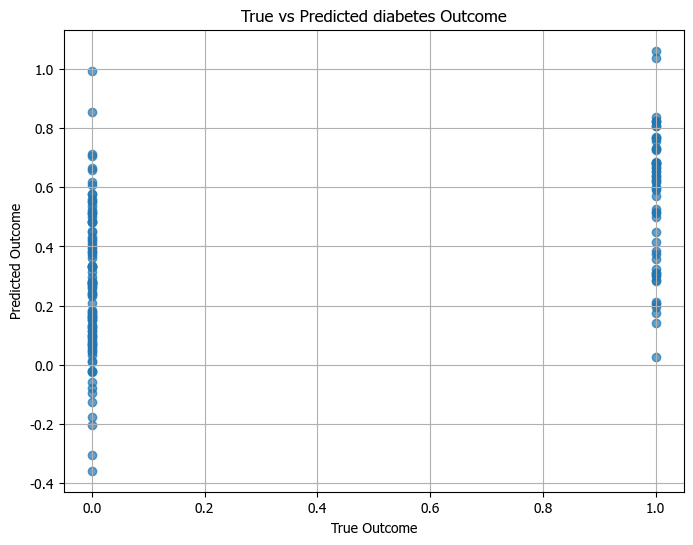

In [30]:
# 7. Visualization: True vs Predicted

fig = plt.figure(figsize = (8, 6))
plt.scatter(y_test, y_pred, alpha = 0.7)
plt.xlabel('True Outcome')
plt.ylabel('Predicted Outcome')
plt.title('True vs Predicted diabetes Outcome')
plt.grid(True)
plt.show()
fig.savefig('True vs Predicted diabetes Outcome')


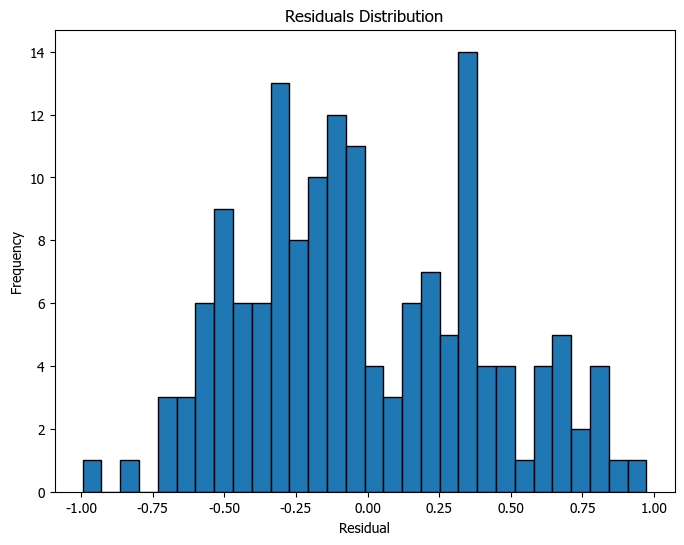

In [31]:
# 8. Optional: Residual Plot

residuals = y_test - y_pred
fig = plt.figure(figsize = (8, 6))
plt.hist(residuals, bins = 30, edgecolor = 'k')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.show()
fig.savefig('Residuals Distribution')


In [26]:
# 9. Save coefficients to CSV

coeff_df.to_csv('diabetes_ffeature_coefficients.csv', index = False)
print('\nAnalysis complete. Coefficients saved to diabertes_feature_coefficients.csv')



Analysis complete. Coefficients saved to diabertes_feature_coefficients.csv


In [2]:
import subprocess
import sys

def convert_to_pdf(notebook_path):
    try:
        subprocess.check_call([sys.executable, "-m", "nbconvert", "--to", "pdf", notebook_path])
        print("تبدیل با موفقیت انجام شد")
    except Exception as e:
        print(f"خطا: {e}")
        print("در حال تبدیل به HTML...")
        subprocess.check_call([sys.executable, "-m", "nbconvert", "--to", "html", notebook_path])

# استفاده
convert_to_pdf("Diabetes.ipynb")


خطا: Command '['C:\\Users\\a.mohammadlou\\AppData\\Local\\anaconda3\\python.exe', '-m', 'nbconvert', '--to', 'pdf', 'Diabetes.ipynb']' returned non-zero exit status 1.
در حال تبدیل به HTML...
